### The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
income_df = pd.read_csv(r"C:\Users\TOLU\Downloads\adult.csv\adult.csv")
income_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
income_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Dealing with Missing Value

In [4]:
income_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
#Attributes workclass, occupation, and native-country most NAs. Let's drop these NA.

In [6]:
income_df.age = income_df.age.astype(float)
income_df['hours_per_week'] = income_df['hours.per.week'].astype(float)

In [7]:
my_df = income_df.dropna()

In [8]:
my_df['predclass'] = my_df['income']
del my_df['income']
my_df['education_number'] = my_df['education.num']
del my_df['education.num']
my_df['marital_status'] = my_df['marital.status']
del my_df['marital.status']
my_df['native_country'] = my_df['native.country']
del my_df['native.country']

In [9]:
my_df['predclass']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: predclass, Length: 32561, dtype: object

In [10]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               32561 non-null  float64
 1   workclass         32561 non-null  object 
 2   fnlwgt            32561 non-null  int64  
 3   education         32561 non-null  object 
 4   occupation        32561 non-null  object 
 5   relationship      32561 non-null  object 
 6   race              32561 non-null  object 
 7   sex               32561 non-null  object 
 8   capital.gain      32561 non-null  int64  
 9   capital.loss      32561 non-null  int64  
 10  hours.per.week    32561 non-null  int64  
 11  hours_per_week    32561 non-null  float64
 12  predclass         32561 non-null  object 
 13  education_number  32561 non-null  int64  
 14  marital_status    32561 non-null  object 
 15  native_country    32561 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [11]:
my_df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
occupation          0
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
hours_per_week      0
predclass           0
education_number    0
marital_status      0
native_country      0
dtype: int64

In [12]:
my_df.shape

(32561, 16)

#### Feature Engineering

In [13]:
print('workclass', my_df.workclass.unique())
print('education', my_df.education.unique())
print('marital_status', my_df['marital_status'] .unique())
print('occupation', my_df.occupation.unique())
print('occupation',my_df.occupation.unique())
print('relationship',my_df.relationship.unique())
print('race',my_df.race.unique())
print('sex',my_df.sex.unique())
print('native_country',my_df['native_country'].unique())
print('predclass',my_df.predclass.unique())

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital_status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship ['Not-in-family' 'Unmarried' 'Own-child' '

In [14]:
predclass1 = my_df[my_df['predclass'] == 1]
predclass0 = my_df[my_df['predclass'] == 0]

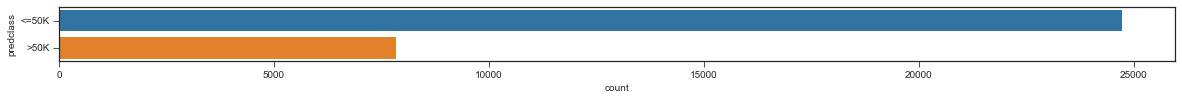

In [15]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df)

#### Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed. However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group.



#### Education

In [16]:
my_df['education'].replace('Preschool', 'dropout', inplace = True)
my_df['education'].replace('10th', 'dropout', inplace = True)
my_df['education'].replace('11th', 'dropout', inplace = True)
my_df['education'].replace('12th', 'dropout', inplace = True)
my_df['education'].replace('1st-4th', 'dropout', inplace = True)
my_df['education'].replace('5th-6th', 'dropout', inplace = True)
my_df['education'].replace('7th-8th', 'dropout', inplace = True)
my_df['education'].replace('9th', 'dropout', inplace = True)
my_df['education'].replace('HS-Grad', 'HighGrad', inplace = True)
my_df['education'].replace('HS-grad', 'HighGrad', inplace = True)
my_df['education'].replace('Some-college', 'CommunityCollege', inplace = True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege', inplace = True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege', inplace = True)
my_df['education'].replace('Bachelors', 'Bachelors', inplace = True)
my_df['education'].replace('Masters', 'Masters', inplace = True)
my_df['education'].replace('Prof-school', 'Masters', inplace = True)
my_df['education'].replace('Doctorate', 'Doctorate', inplace = True)







In [17]:
my_df[['education', 'education_number']].groupby(['education'], as_index=False).mean().sort_values(by ='education_number', ascending =False)

,education,education_number
2,Doctorate,16.000000
4,Masters,14.250544
0,Bachelors,13.000000
1,CommunityCollege,10.360986
3,HighGrad,9.000000
5,dropout,5.602398


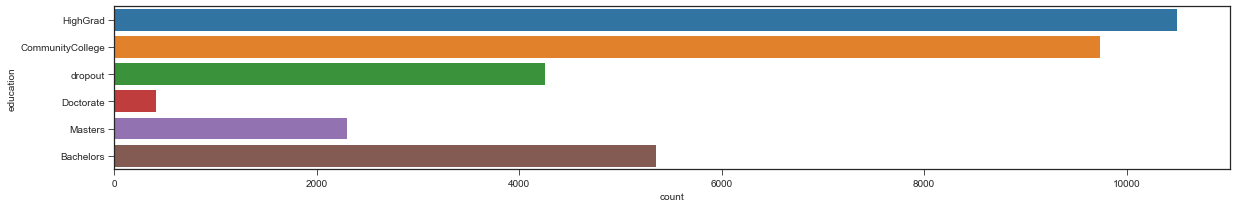

In [18]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y ="education", data = my_df)

#### Marital_staus

In [19]:
my_df['marital_status'].replace("Never-married", 'NotMarried', inplace = True)
my_df['marital_status'].replace(["Married-AF-spouse"], 'Married', inplace = True)
my_df['marital_status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['marital_status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital_status'].replace(['Separated'], 'Separated',inplace=True)
my_df['marital_status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['marital_status'].replace(['Widowed'], 'Widowed',inplace=True)


#### Occupation

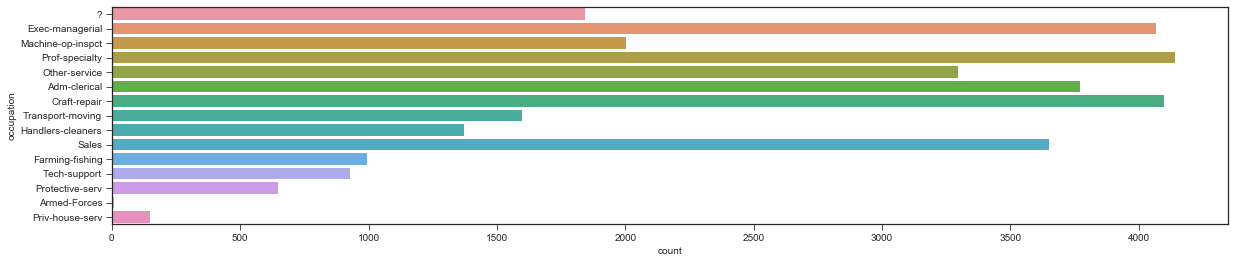

In [20]:
plt.style.use('seaborn-ticks')
plt.figure(figsize =(20, 4))
sns.countplot(y="occupation", data= my_df)

### Workclass

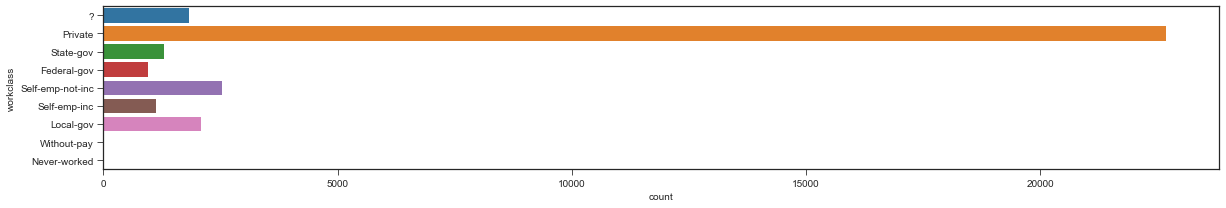

In [21]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3))
sns.countplot(y="workclass", data=my_df)

#### Age

In [22]:
#let categorize ages 
my_df['age_bin'] = pd.cut(my_df['age'], 20)

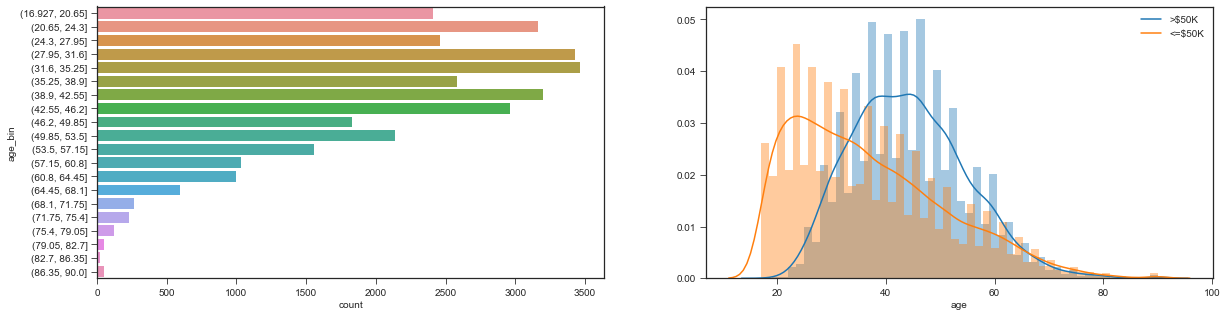

In [23]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=my_df)
plt.subplot(1,2,2)
sns.distplot(my_df[my_df['predclass'] == '>50K']['age'], 
kde_kws ={'label': '>$50K'})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age'], kde_kws={'label': "<=$50K"})

In [24]:
my_df[['predclass', 'age']].groupby(['predclass'], as_index =False).mean().sort_values(by = "age", ascending =False)

,predclass,age
1,>50K,44.249841
0,<=50K,36.783738


##### Race

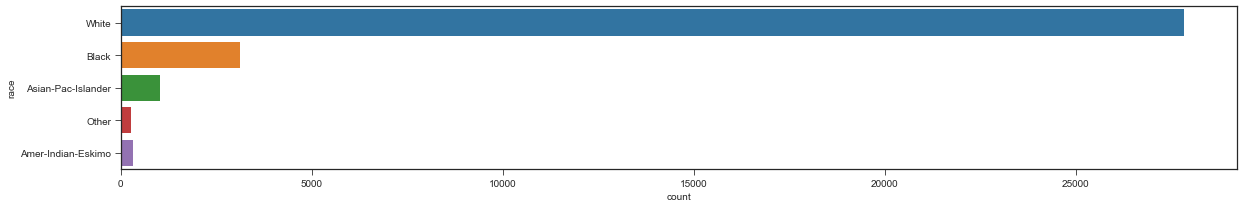

In [25]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3))
sns.countplot(y="race", data=my_df)




<Figure size 1440x360 with 0 Axes>

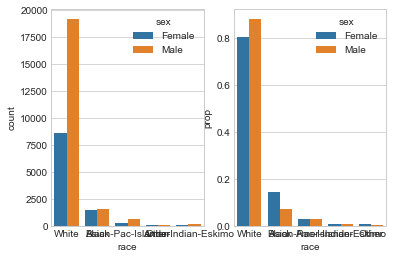

In [26]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

#### Hours of Work

In [27]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
my_df['hours_per_week_bin'] = pd.cut(my_df['hours_per_week'], 10)
my_df['hours_per_week'] = my_df['hours_per_week']

(20, 60)

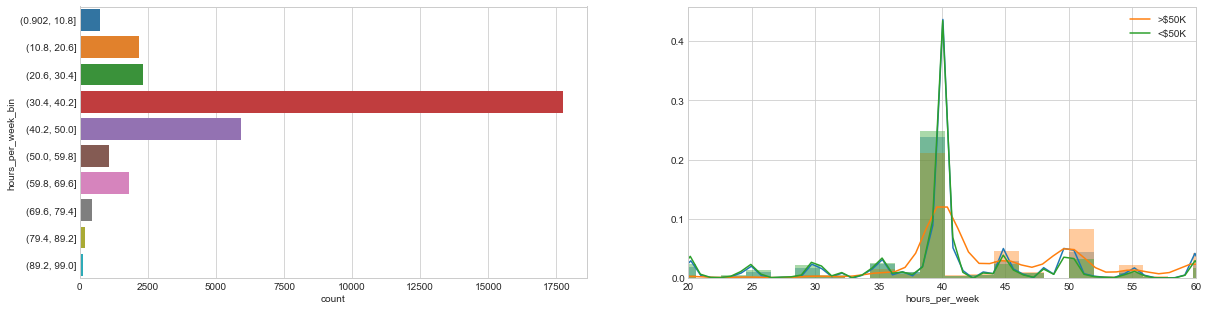

In [28]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours_per_week_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hours_per_week']);
sns.distplot(my_df[my_df['predclass'] == '>50K']['hours_per_week'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['hours_per_week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)


#### Create a crossing feature: Age + hour of work

C:\Users\TOLU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


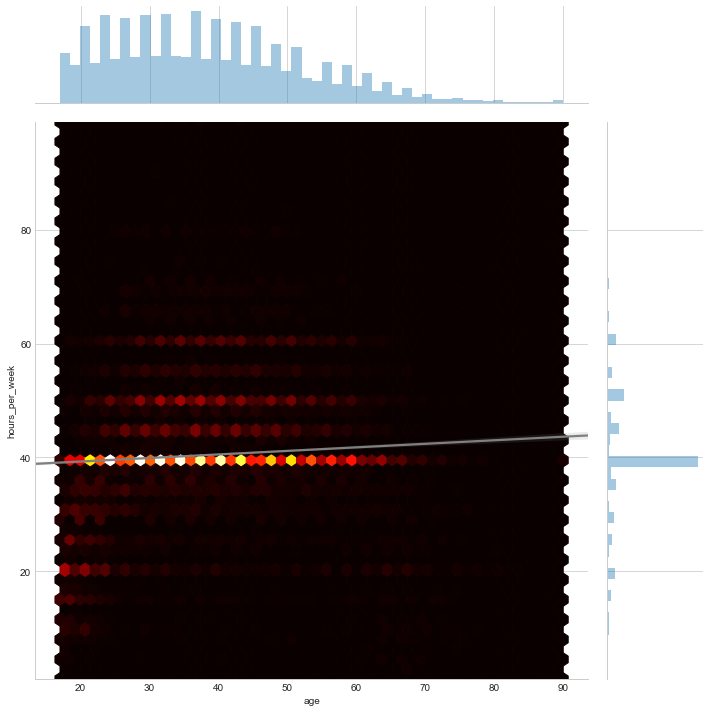

In [29]:
g = sns.jointplot(x ='age', 
                 y = 'hours_per_week',
                 data = my_df,
                 kind ='hex',
                 cmap = 'hot',
                 size = 10)
sns.regplot(my_df.age, my_df['hours_per_week'], ax=g.ax_joint, scatter =False, color ='grey')

In [30]:
my_df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,hours_per_week,predclass,education_number,marital_status,native_country,age_bin,hours_per_week_bin
0,90.0,?,77053,HighGrad,?,Not-in-family,White,Female,0,4356,40,40.0,<=50K,9,Widowed,United-States,"(86.35, 90.0]","(30.4, 40.2]"
1,82.0,Private,132870,HighGrad,Exec-managerial,Not-in-family,White,Female,0,4356,18,18.0,<=50K,9,Widowed,United-States,"(79.05, 82.7]","(10.8, 20.6]"
2,66.0,?,186061,CommunityCollege,?,Unmarried,Black,Female,0,4356,40,40.0,<=50K,10,Widowed,United-States,"(64.45, 68.1]","(30.4, 40.2]"
3,54.0,Private,140359,dropout,Machine-op-inspct,Unmarried,White,Female,0,3900,40,40.0,<=50K,4,Separated,United-States,"(53.5, 57.15]","(30.4, 40.2]"
4,41.0,Private,264663,CommunityCollege,Prof-specialty,Own-child,White,Female,0,3900,40,40.0,<=50K,10,Separated,United-States,"(38.9, 42.55]","(30.4, 40.2]"


### EDA


#### Pair Plot

C:\Users\TOLU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


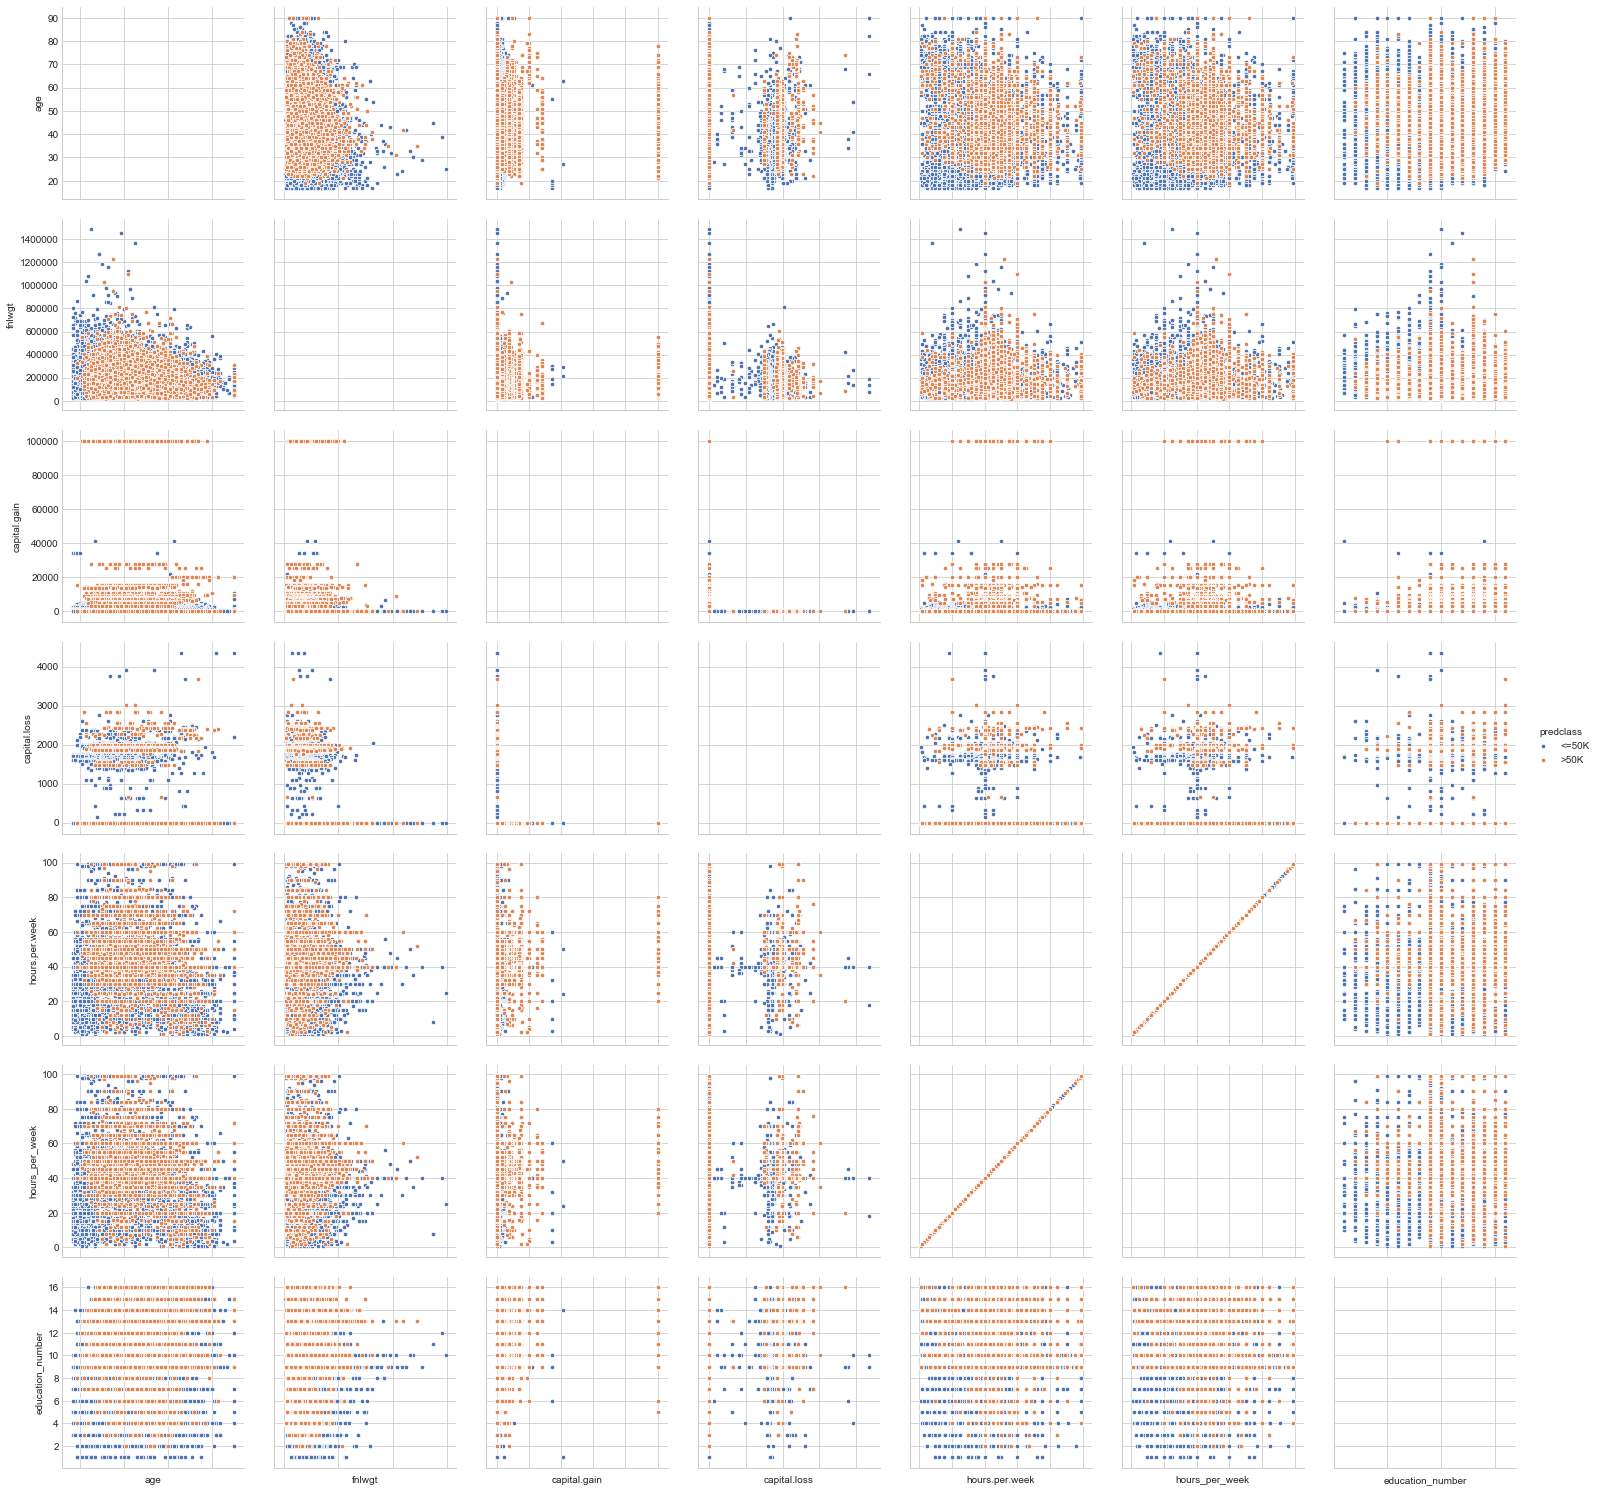

In [31]:
#pair plots of entire dataset
pp = sns.pairplot(my_df,hue = 'predclass',palette = 'deep', 
                  size=3, diag_kind = '10', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

### Bivariate Analysis 

In [32]:
my_df.tail()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,hours_per_week,predclass,education_number,marital_status,native_country,age_bin,hours_per_week_bin
32556,22.0,Private,310152,CommunityCollege,Protective-serv,Not-in-family,White,Male,0,0,40,40.0,<=50K,10,NotMarried,United-States,"(20.65, 24.3]","(30.4, 40.2]"
32557,27.0,Private,257302,CommunityCollege,Tech-support,Wife,White,Female,0,0,38,38.0,<=50K,12,Married,United-States,"(24.3, 27.95]","(30.4, 40.2]"
32558,40.0,Private,154374,HighGrad,Machine-op-inspct,Husband,White,Male,0,0,40,40.0,>50K,9,Married,United-States,"(38.9, 42.55]","(30.4, 40.2]"
32559,58.0,Private,151910,HighGrad,Adm-clerical,Unmarried,White,Female,0,0,40,40.0,<=50K,9,Widowed,United-States,"(57.15, 60.8]","(30.4, 40.2]"
32560,22.0,Private,201490,HighGrad,Adm-clerical,Own-child,White,Male,0,0,20,20.0,<=50K,9,NotMarried,United-States,"(20.65, 24.3]","(10.8, 20.6]"


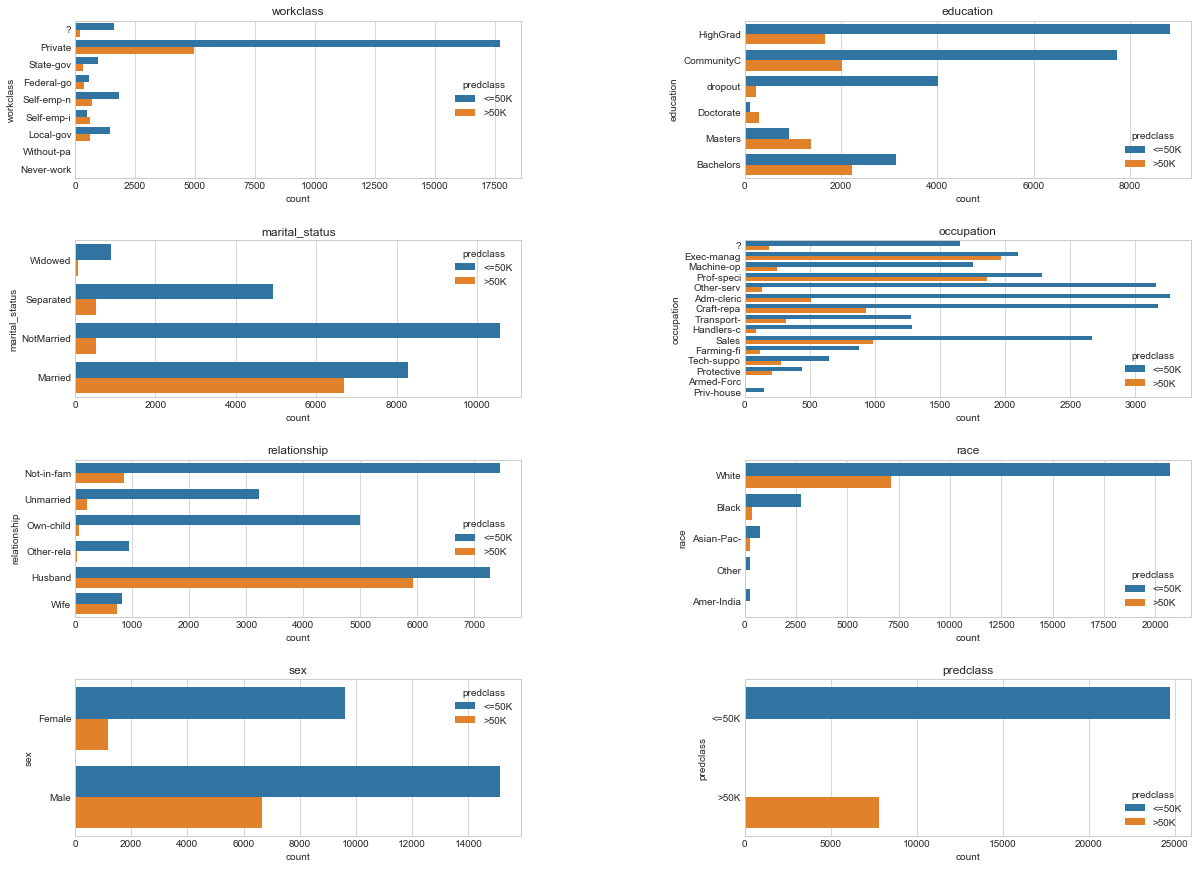

In [33]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
bivariate_df = my_df.loc[:, ['workclass', 'education', 
           'marital_status', 'occupation', 
           'relationship', 'race', 'sex','predclass']]  

plot_bivariate_bar(bivariate_df, hue='predclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

### Occupation vs. Income Level

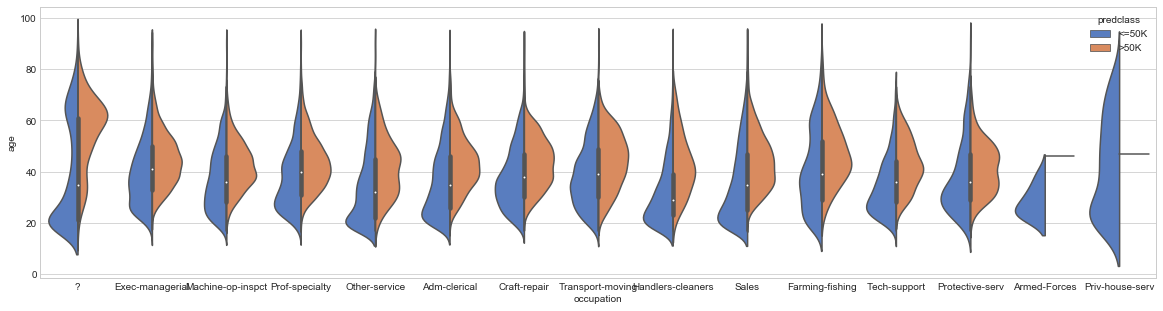

In [34]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

#### it is seen that more senior workers have higher salaries. Armed-forces don't have a high job salaries. Interestingly, private house sevice has the widest range of age variation, however, the payment is no higher than 50K, indicating that senority doesn't give rise to a higher payment comparing to other jobs.

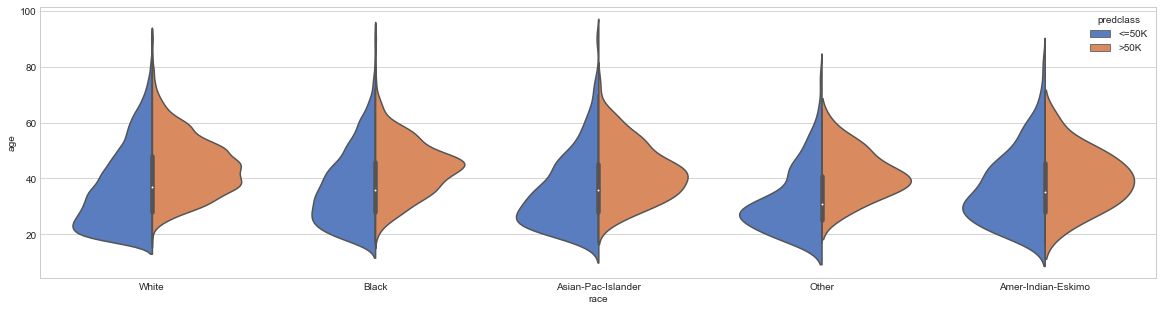

In [35]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

### Building Machine Learning Models

In [36]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix




In [37]:
### Feature Selection and  Encoding

from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [39]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,hours_per_week,predclass,education_number,marital_status,native_country,age_bin,hours_per_week_bin
0,72,0,2649,3,0,1,4,0,0,91,39,39,0,8,3,39,19,3
1,65,4,6514,3,4,1,4,0,0,91,17,17,0,8,3,39,17,1
2,49,0,11175,1,0,4,2,0,0,91,39,39,0,9,3,39,13,3
3,37,4,7009,5,7,4,4,0,0,90,39,39,0,3,2,39,10,3
4,24,4,16850,1,10,3,4,0,0,90,39,39,0,9,2,39,6,3


### Train-Test split

In [42]:
drop_element = ['education', 'native_country', 'predclass', 'age_bin', 'hours_per_week_bin']
y = my_df['predclass']
X = my_df.drop(drop_element, axis = 1)
X.head()

,age,workclass,fnlwgt,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,hours_per_week,education_number,marital_status
0,72,0,2649,0,1,4,0,0,91,39,39,8,3
1,65,4,6514,4,1,4,0,0,91,17,17,8,3
2,49,0,11175,0,4,2,0,0,91,39,39,9,3
3,37,4,7009,7,4,4,0,0,90,39,39,3,2
4,24,4,16850,10,3,4,0,0,90,39,39,9,2


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

### Principal Component Analysis

In [44]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

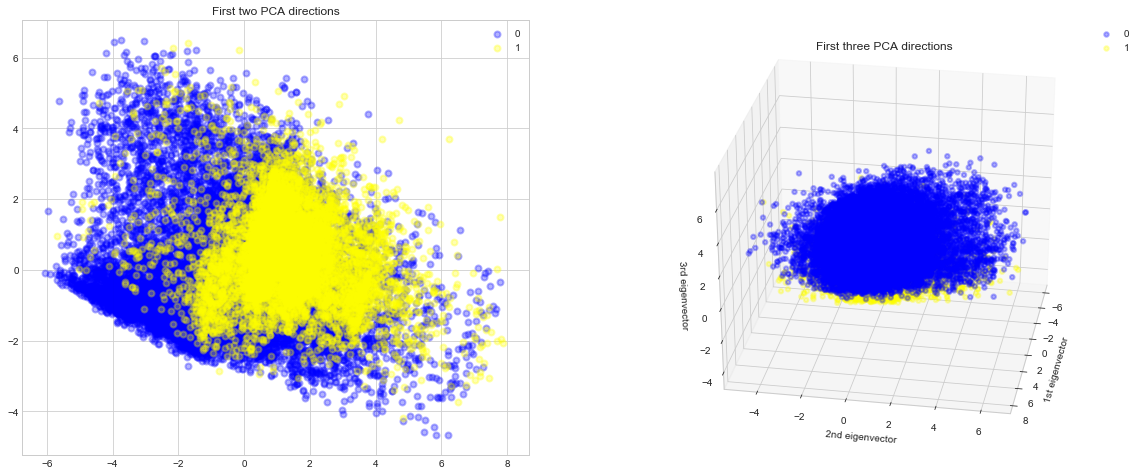

In [45]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(my_df.drop('predclass', axis=1))
X = std_scale.transform(my_df.drop('predclass', axis=1))
y = my_df['predclass']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))
plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')
pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
# rotate the axes
ax.view_init(30, 10)

In [46]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components = None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running 

array([0.21021101, 0.32564634, 0.41915049, 0.50778283, 0.5890693 ,
       0.66579992, 0.74088525, 0.81319574, 0.87348928, 0.92862629,
       0.97076941, 1.        , 1.        ])

### Gaussian Naive Bayes

In [47]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#ypred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test, y_test)
print('The Accuracy of Gaussian Naive Bayes is', score_gaussian)

The Accuracy of Gaussian Naive Bayes is 0.8206663595885153


### Logistic Regression

In [48]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.7925687087363734


C:\Users\TOLU\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Random Forest

In [49]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8578228159066482


### K-Nearest Neighbors

In [53]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.783049286043298


### Linear Support Vector Machine

In [55]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.7620144326731153


### Radial Support Vector Machine

In [59]:
from sklearn.svm import SVC
svc_radical =SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.7620144326731153


In [62]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest']
models=[GaussianNB(), SVC(kernel='linear'),SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       

models_dataframe

,CV Mean,Std
Naive Bayes,0.819600,0.039144
Linear Svm,0.797528,0.107113
Radial Svm,0.797103,0.154495
Logistic Regression,0.804068,0.092908
Decision Tree,0.779220,0.062009
KNN,0.807570,0.093254
Random Forest,0.820436,0.070515
